In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.multioutput import MultiOutputRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn import model_selection
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import pickle

In [2]:
# Dataset con las features de los 4 canales

dataset_front = pd.read_csv('dataset_completo.csv', index_col=None)

In [3]:
# Creacion del train y test

features = dataset_front.columns[3:]
labels = dataset_front.columns[1:3]

X = dataset_front[features]
y = dataset_front[labels]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(584, 288) (146, 288) (584, 2) (146, 2)


In [4]:
# Aplico la transformación

cols = X_train.columns

scaler =MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)
X_train = pd.DataFrame(X_train, columns=[cols])
X_test= pd.DataFrame(X_test)

## Modelos:

- MultiOutputRegressor - Random Forest Regressor
    
- DecisionTreeRegressor

In [5]:
multi_forest = MultiOutputRegressor(RandomForestRegressor(n_estimators=100,max_depth=30,random_state=2))

dec_tree = DecisionTreeRegressor(max_depth=10)

## Comparación de modelos

In [6]:
models = [multi_forest, dec_tree]

for model in models:
    model.fit(X_train, y_train)
    score = model.score(X_train, y_train)
    cross_score = cross_val_score(model, X_train, y_train, cv=6)
    print(" Score: {}".format(score))
    print(" Accuracy: %0.2f (+/- %0.2f)" % (cross_score.mean(), cross_score.std() * 2))

 Score: 0.8573054248501786
 Accuracy: -0.03 (+/- 0.08)
 Score: 0.6817165100750144
 Accuracy: -0.83 (+/- 0.56)


In [7]:
models = [('Forest',multi_forest),('Decision tree',dec_tree)]

for name, model in models:
    y_pred = model.predict(X_test)
    print(name, "- R2_SCORE:{}".format(r2_score(y_test, y_pred)))
    print(name, "- mean_squared_error:{}".format(mean_squared_error(y_test, y_pred)))
    print(name, "- mean_absolute_error:{} \n".format(mean_absolute_error(y_test, y_pred)))

Forest - R2_SCORE:-0.027529599008092598
Forest - mean_squared_error:443.2944136440698
Forest - mean_absolute_error:17.090090616438356 

Decision tree - R2_SCORE:-0.7458878598760158
Decision tree - mean_squared_error:753.043972360328
Decision tree - mean_absolute_error:20.724578020010252 



## Decision Tree Regressor

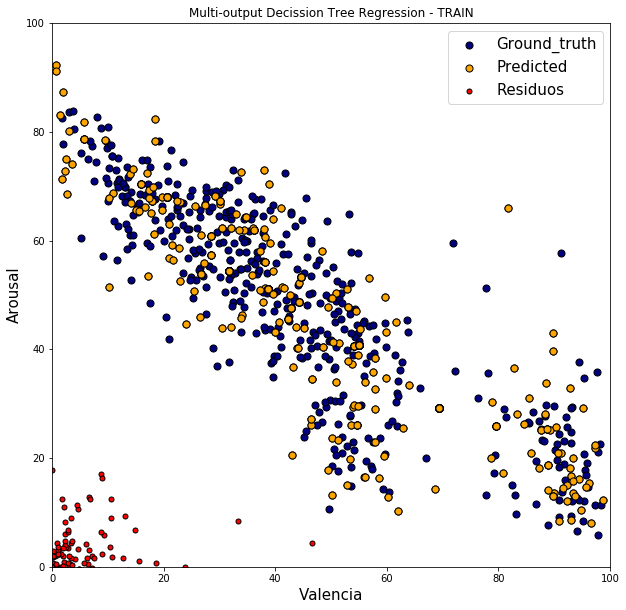

In [9]:
dec_tree.fit(X_train, y_train)
y_predict = dec_tree.predict(X_train)

fig = plt.figure(figsize = (10,10))
s = 50
plt.scatter(y_train.iloc[:, 0], y_train.iloc[:, 1], c="navy", s=s,
            edgecolor="black", label="Ground_truth")
plt.scatter(y_predict[:, 0], y_predict[:, 1], c="orange", s=s,
            edgecolor="black", label="Predicted")
plt.scatter(y_train.iloc[:, 0]-y_predict[:, 0], y_train.iloc[:, 1] - y_predict[:, 1], c="red", s=25,
            edgecolor="black", label="Residuos")

plt.xlim([0, 100])
plt.ylim([0, 100])
plt.xlabel("Valencia", fontsize = 15)
plt.ylabel("Arousal", fontsize = 15)
plt.title("Multi-output Decission Tree Regression - TRAIN")
plt.legend(loc="best", fontsize = 15)
plt.show()
fig.savefig('dectree_model.png')

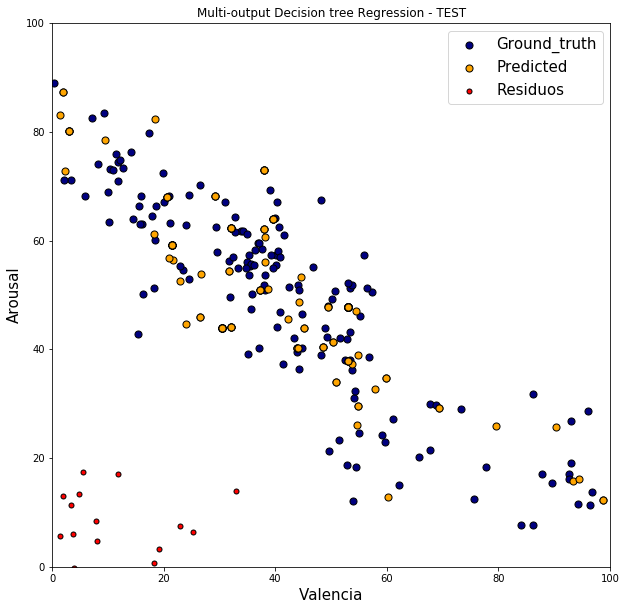

In [10]:
y_predict = dec_tree.predict(X_test)

plt.figure(figsize = (10,10))
s = 50
plt.scatter(y_test.iloc[:, 0], y_test.iloc[:, 1], c="navy", s=s,
            edgecolor="black", label="Ground_truth")
plt.scatter(y_predict[:, 0], y_predict[:, 1], c="orange", s=s,
            edgecolor="black", label="Predicted")
plt.scatter(y_test.iloc[:, 0]-y_predict[:, 0], y_test.iloc[:, 1] - y_predict[:, 1], c="red", s=25,
            edgecolor="black", label="Residuos")

plt.xlim([0, 100])
plt.ylim([0, 100])
plt.xlabel("Valencia",fontsize = 15)
plt.ylabel("Arousal", fontsize = 15)
plt.title("Multi-output Decision tree Regression - TEST")
plt.legend(loc="best",fontsize = 15)
plt.show()

In [11]:
y_predict_train = dec_tree.predict(X_train)

r2_score(y_predict_train, y_train)

0.5307588668838945

In [12]:
y_predict_test = dec_tree.predict(X_test)

r2_score(y_predict_test, y_test)

-1.7857412826491859

In [13]:
Predicted_valence = (dec_tree.predict(X_test))[:, 0]
Predicted_arousal = (dec_tree.predict(X_test))[:, 1]

df1  = pd.DataFrame(np.array([Predicted_valence,y_test.iloc[:, 0],Predicted_valence-y_test.iloc[:, 0],Predicted_arousal,y_test.iloc[:, 1],Predicted_arousal-y_test.iloc[:, 1]]).T)

df1.columns = ['Predicted Valence', 'Groundtruth Valence','Error diference Valence','Predicted Arousal', 'Groundtruth Arousal','Error diference Arousal']

display('Media de los errores:{},{}'.format((np.sum(np.abs(df1['Error diference Valence'])))/len(y_test),(np.sum(np.abs(df1['Error diference Arousal'])))/len(y_test)))
display(df1.head())

'Media de los errores:22.185834122212285,18.950577625570773'

,Predicted Valence,Groundtruth Valence,Error diference Valence,Predicted Arousal,Groundtruth Arousal,Error diference Arousal
0,21.530000,11.817,9.713000,59.229000,74.541,-15.312000
1,20.649000,12.776,7.873000,68.046107,73.275,-5.228893
2,20.649000,51.367,-30.718000,68.046107,23.246,44.800107
3,20.649000,43.835,-23.186000,68.046107,39.574,28.472107
4,38.618769,52.419,-13.800231,51.147500,37.989,13.158500


## MultiOutputRegressor + RandomForestRegressor

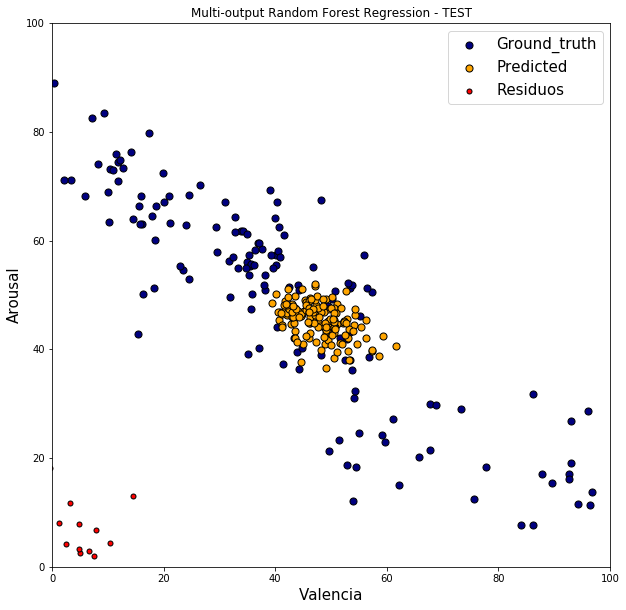

In [14]:
multi_forest.fit(X_train, y_train)

y_predict = multi_forest.predict(X_test)

fig = plt.figure(figsize = (10,10))
s = 50
plt.scatter(y_test.iloc[:, 0], y_test.iloc[:, 1], c="navy", s=s,
            edgecolor="black", label="Ground_truth")
plt.scatter(y_predict[:, 0], y_predict[:, 1], c="orange", s=s,
            edgecolor="black", label="Predicted")
plt.scatter(y_test.iloc[:, 0]-y_predict[:, 0], y_test.iloc[:, 1] - y_predict[:, 1], c="red", s=25,
            edgecolor="black", label="Residuos")

plt.xlim([0, 100])
plt.ylim([0, 100])
plt.xlabel("Valencia",fontsize = 15)
plt.ylabel("Arousal",fontsize = 15)
plt.title("Multi-output Random Forest Regression - TEST")
plt.legend(loc="best",fontsize = 15)
plt.show()

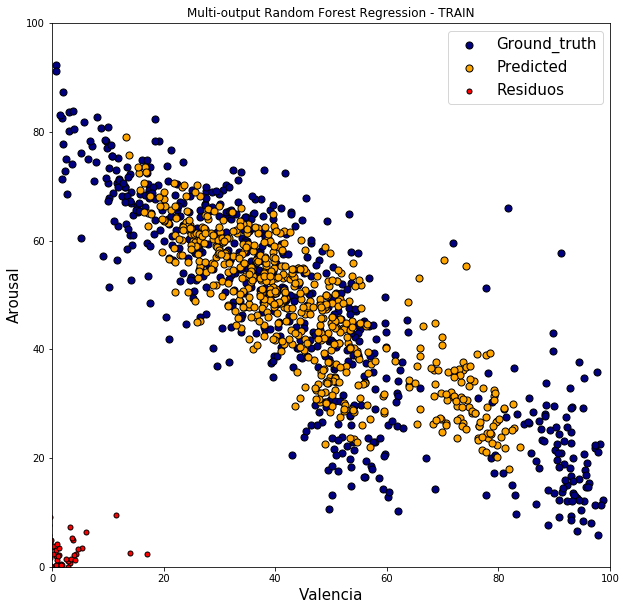

In [15]:
y_predict = multi_forest.predict(X_train)

fig = plt.figure(figsize = (10,10))
s = 50
plt.scatter(y_train.iloc[:, 0], y_train.iloc[:, 1], c="navy", s=s,
            edgecolor="black", label="Ground_truth")
plt.scatter(y_predict[:, 0], y_predict[:, 1], c="orange", s=s,
            edgecolor="black", label="Predicted")
plt.scatter(y_train.iloc[:, 0]-y_predict[:, 0], y_train.iloc[:, 1] - y_predict[:, 1], c="red", s=25,
            edgecolor="black", label="Residuos")

plt.xlim([0, 100])
plt.ylim([0, 100])
plt.xlabel("Valencia",fontsize = 15)
plt.ylabel("Arousal",fontsize = 15)
plt.title("Multi-output Random Forest Regression - TRAIN")
plt.legend(loc="best",fontsize = 15)
plt.show()
fig.savefig('forest_model.png')


In [16]:
y_predict_train = multi_forest.predict(X_train)

r2_score(y_predict_train, y_train)

0.6557088282952928

In [17]:
y_predict_test = multi_forest.predict(X_test)

r2_score(y_predict_test, y_test)

-31.93814349450183

In [18]:
Predicted_valence = (multi_forest.predict(X_test))[:, 0]
Predicted_arousal = (multi_forest.predict(X_test))[:, 1]

df1  = pd.DataFrame(np.array([Predicted_valence,y_test.iloc[:, 0],Predicted_valence-y_test.iloc[:, 0],Predicted_arousal,y_test.iloc[:, 1],Predicted_arousal-y_test.iloc[:, 1]]).T)

df1.columns = ['Predicted Valence', 'Groundtruth Valence','Error diference Valence','Predicted Arousal', 'Groundtruth Arousal','Error diference Arousal']

display('Media de los errores:{},{}'.format((np.sum(np.abs(df1['Error diference Valence'])))/len(y_test),(np.sum(np.abs(df1['Error diference Arousal'])))/len(y_test)))
display(df1.head())

'Media de los errores:18.12691075342466,16.053270479452053'

,Predicted Valence,Groundtruth Valence,Error diference Valence,Predicted Arousal,Groundtruth Arousal,Error diference Arousal
0,47.23193,11.817,35.41493,41.38870,74.541,-33.15230
1,49.04575,12.776,36.26975,49.23200,73.275,-24.04300
2,51.07579,51.367,-0.29121,48.34933,23.246,25.10333
3,54.63787,43.835,10.80287,41.00527,39.574,1.43127
4,49.37607,52.419,-3.04293,47.46351,37.989,9.47451


## EL MEJOR MODELO ES RANDOM FOREST

In [ ]:
multi_forest = MultiOutputRegressor(RandomForestRegressor(n_estimators=100,max_depth=30,random_state=2))
multi_forest.fit(X_train, y_train)
filename = 'forest_model.sav'
pickle.dump(multi_forest, open(filename, 'wb'))

In [ ]:
dec_tree = DecisionTreeRegressor(max_depth=10)
dec_tree.fit(X_train, y_train)
filename = 'dectree_model.sav'
pickle.dump(dec_tree, open(filename, 'wb'))